In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# import dataset
df = pd.read_csv("adult.data",header = None)
df_test = pd.read_csv("adult_test.data", header=None)
header = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
df.columns = header
df_test.columns = header


In [3]:
df.shape

(32561, 15)

In [4]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i] = df[i].str.strip()
        
for i in df_test.columns:
    if df_test[i].dtype=="object":
        df_test[i] = df_test[i].str.strip()

In [6]:
df_test.shape

(16281, 15)

# Data exploration

In [7]:
df = df.replace("?",np.nan)
df = df.dropna()
df_test = df_test.replace("?",np.nan)
df_test =df_test.dropna()

In [8]:
df.drop_duplicates()
df_test.drop_duplicates()
print(df.shape)
print(df_test.shape)

(30162, 15)
(15060, 15)


Text(-6.573, 0.5, 'Count')

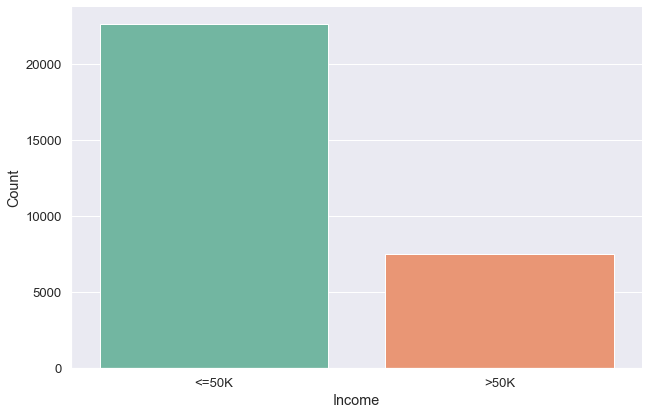

In [9]:
sns.set(style="darkgrid",font_scale = 1.2,palette="Set2")
ax = sns.catplot(x="income",data=df, kind="count",height=6, aspect=6/4)
plt.xlabel("Income")
plt.ylabel("Count")

In [10]:
df.income.value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

Text(0, 0.5, 'Percentage')

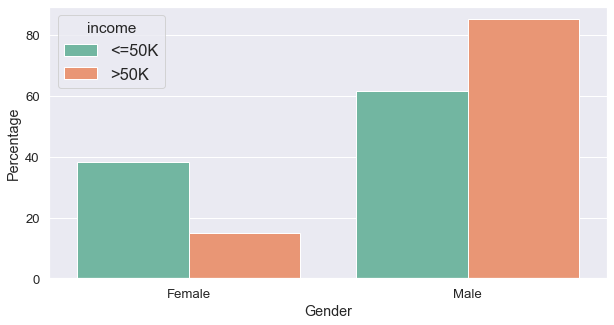

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sex_counts = (df.groupby(['income'])['sex']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('sex'))

sns.set(style="darkgrid",font_scale = 1.5,palette="Set2",)
sns.barplot(x="sex", y="percentage", hue="income", data=sex_counts)
plt.xlabel("Gender")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

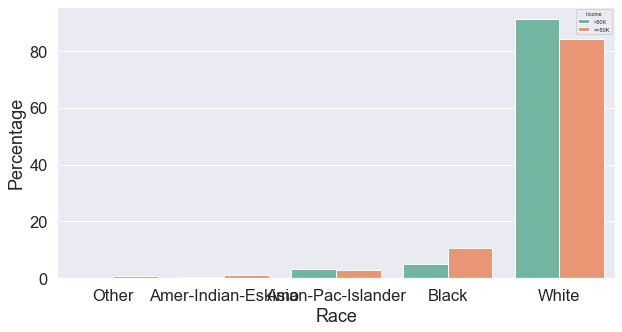

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
race_counts = df.groupby(["income"])["race"].value_counts(normalize = True).rename("percentage").mul(100).sort_values().reset_index()
sns.set(style = "darkgrid", font_scale  = 0.5, palette = "Set2")
sns.barplot(x = "race", y = "percentage",hue = "income",  data = race_counts)
plt.xlabel("Race")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

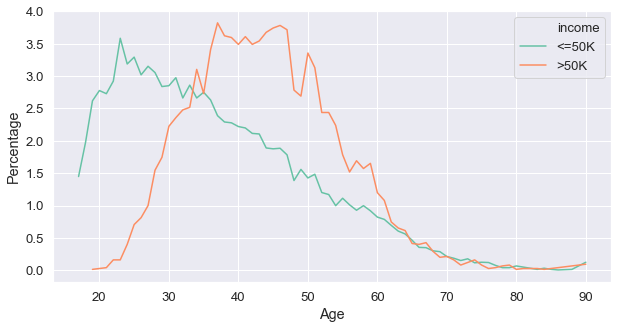

In [14]:
fig,ax= plt.subplots(figsize = (10,5)) 
age_counts = df.groupby(["income"])["age"].value_counts(normalize = True).rename("percentage").mul(100).reset_index()
sns.set(style = "darkgrid", font_scale  = 1.2, palette = "Set2", )
p = sns.lineplot(x ="age", y = "percentage", hue = "income", data = age_counts)
plt.xlabel("Age")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

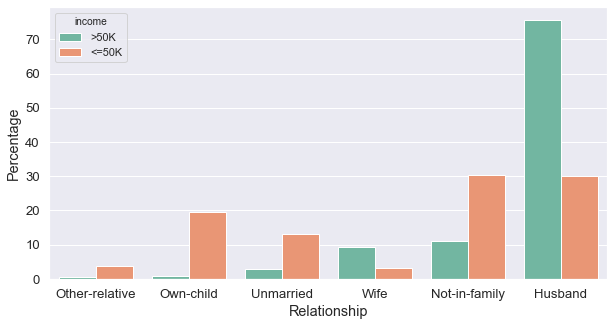

In [15]:
fig,ax= plt.subplots(figsize = (10,5)) 
relationship_counts = df.groupby(["income"])["relationship"].value_counts(normalize = True).rename("percentage").mul(100).sort_values().reset_index()
sns.set(style = "darkgrid", font_scale  = 1, palette = "Set2", )
sns.barplot(x ="relationship", y = "percentage", hue = "income", data = relationship_counts, ci=None)
plt.xlabel("Relationship")
plt.ylabel("Percentage")

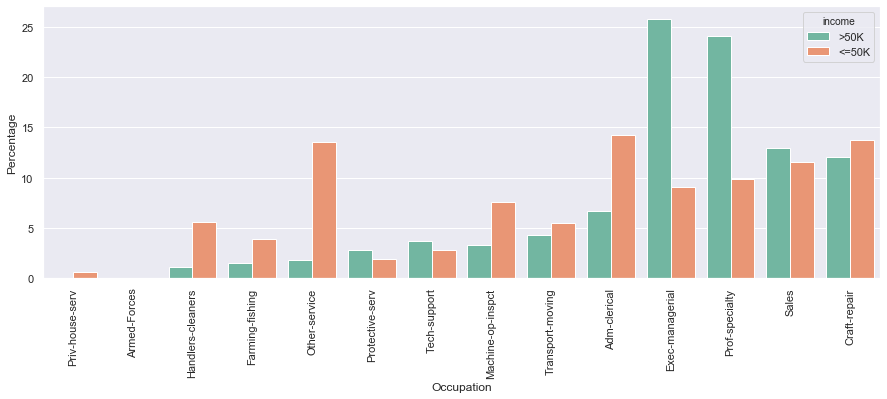

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
occupation_counts = df.groupby(["income"])["occupation"].value_counts(normalize = True).rename("percentage").mul(100).sort_values().reset_index()
sns.set(style = "darkgrid", font_scale  = 1, palette = "Set2")
p = sns.barplot(x = "occupation", y = "percentage",hue = "income",  data = occupation_counts)
plt.xlabel("Occupation")
plt.ylabel("Percentage")
_ = plt.setp(p.get_xticklabels(), rotation=90)

# Feature Engineering

In [17]:
#combine the self employed and goverment emloyees category
df.workclass.value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [18]:
self_employed = ["Self-emp-not-inc","Self-emp-inc"]
gov = ["Local-gov","State-gov", "Federal-gov"]

df["workclass"].replace(to_replace = self_employed, value = "self-employed", inplace = True)
df["workclass"].replace(to_replace = gov, value = "gov", inplace = True)

df["workclass"].value_counts()

Private          22286
gov               4289
self-employed     3573
Without-pay         14
Name: workclass, dtype: int64

In [19]:
#combine HighSchool and Elementary school
pd.crosstab(df["education"],df["education-num"])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,820,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1048,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,377,0,0,0,0,0,0,0,0
1st-4th,0,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,288,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,557,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,455,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1008,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1307,0,0,0,0,0


In [20]:
highschool = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

df["education"].replace(to_replace = highschool,value = "High_school", inplace = True)
df["education"].replace(to_replace = elementary,value = "Elementary_school",inplace = True)

df['education'].value_counts()

High_school          12540
Some-college          6678
Bachelors             5044
Masters               1627
Assoc-voc             1307
Assoc-acdm            1008
Elementary_school      996
Prof-school            542
Doctorate              375
Preschool               45
Name: education, dtype: int64

In [21]:
#creat order of education level
def education_lv(x):
    if x == "Preschool":
        return 1
    elif x == "Elementary_school":
        return 2
    elif x== "High_school":
        return 3
    elif x== "Some-college":
        return 4
    elif x== "Assoc-voc":
        return 5
    elif x== "Assoc-acdm":
        return 6
    elif x== "Bachelors":
        return 7    
    elif x== "Masters":
        return 8        
    elif x== "Prof-school":
        return 9
    elif x=="Doctorate":
        return 10

df['education_num'] = df['education'].apply(education_lv) 

In [22]:
pd.crosstab(df["education"],df["education_num"])

education_num,1,2,3,4,5,6,7,8,9,10
education,,,,,,,,,,
Assoc-acdm,0,0,0,0,0,1008,0,0,0,0
Assoc-voc,0,0,0,0,1307,0,0,0,0,0
Bachelors,0,0,0,0,0,0,5044,0,0,0
Doctorate,0,0,0,0,0,0,0,0,0,375
Elementary_school,0,996,0,0,0,0,0,0,0,0
High_school,0,0,12540,0,0,0,0,0,0,0
Masters,0,0,0,0,0,0,0,1627,0,0
Preschool,45,0,0,0,0,0,0,0,0,0
Prof-school,0,0,0,0,0,0,0,0,542,0


Text(0, 0.5, 'Percentage')

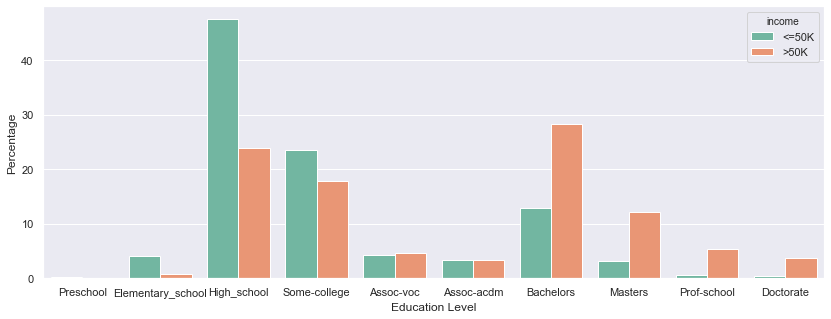

In [23]:
order = ["Preschool","Elementary_school","High_school","Some-college","Assoc-voc","Assoc-acdm","Bachelors","Masters","Prof-school","Doctorate"]
fig,ax= plt.subplots(figsize = (14,5)) 
education_counts = df.groupby(["income"])["education"].value_counts(normalize = True).rename("percentage").mul(100).sort_values().reset_index()
sns.set(style = "darkgrid", font_scale  = 1, palette = "Set2", )
sns.barplot(x ="education", y = "percentage", hue = "income", data = education_counts, order = order)
plt.xlabel("Education Level")
plt.ylabel("Percentage")

In [25]:
df.drop(columns = "education", inplace=True)
df.drop(columns = "education-num", inplace=True)

In [33]:
#categorise US and non-US
non_US=df["native-country"].unique().tolist()
non_US.remove("United-States")
non_US

df["native-country"].replace(to_replace = non_US,value = "non-US", inplace = True)


df['native-country'].value_counts()

United-States    27504
non-US            2658
Name: native-country, dtype: int64

In [26]:
#Combine Married and Separated category
Married = ["Married-AF-spouse","Married-civ-spouse","Married-spouse-absent"]
Separated = ["Divorced","Separated"]


df["marital-status"].replace(to_replace= Married, value="Married", inplace=True)
df["marital-status"].replace(to_replace=Separated, value = "Separted", inplace=True)

df["marital-status"].value_counts()

Married          14456
Never-married     9726
Separted          5153
Widowed            827
Name: marital-status, dtype: int64

Text(0, 0.5, 'Percentage')

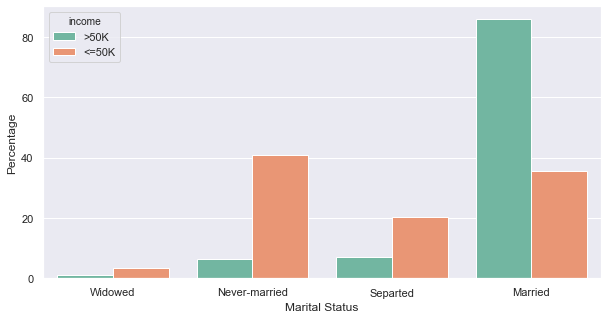

In [27]:
fig,ax= plt.subplots(figsize = (10,5)) 
mar_counts = df.groupby(["income"])["marital-status"].value_counts(normalize = True).rename("percentage").mul(100).sort_values().reset_index()
sns.set(style = "darkgrid", font_scale  = 1, palette = "Set2", )
sns.barplot(x ="marital-status", y = "percentage", hue = "income", data = mar_counts, ci=None)
plt.xlabel("Marital Status")
plt.ylabel("Percentage")

In [28]:
# Categorize age to group
def age_range(x):
    if x < 20:
        group = "<20"
    elif 20 <= x < 30:
        group = "20-29"
    elif 30 <= x < 40:
        group = "30-39"
    elif 40 <= x < 50:
        group = "40-49"
    elif 50 <= x < 60:
        group = "50-59"
    else:
        group = ">60"
    return group
df['age'] = df['age'].apply(age_range) 
df.head()

,age,workclass,fnlwgt,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education_num
0,30-39,gov,77516,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7
1,50-59,self-employed,83311,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,7
2,30-39,Private,215646,Separted,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,3
3,50-59,Private,234721,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3
4,20-29,Private,338409,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,7


# Feature Engineering(Test Dataset)

In [29]:
self_employed = ["Self-emp-not-inc","Self-emp-inc"]
gov = ["Local-gov","State-gov", "Federal-gov"]

df_test["workclass"].replace(to_replace = self_employed, value = "self-employed", inplace = True)
df_test["workclass"].replace(to_replace = gov, value = "gov", inplace = True)

df_test["workclass"].value_counts()

Private          11021
gov               2163
self-employed     1869
Without-pay          7
Name: workclass, dtype: int64

In [30]:
highschool = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

df_test["education"].replace(to_replace = highschool,value = "High_school", inplace = True)
df_test["education"].replace(to_replace = elementary,value = "Elementary_school",inplace = True)

df_test['education'].value_counts()

High_school          6338
Some-college         3221
Bachelors            2526
Masters               887
Assoc-voc             652
Assoc-acdm            499
Elementary_school     498
Prof-school           243
Doctorate             169
Preschool              27
Name: education, dtype: int64

In [31]:
def education_lv(x):
    if x == "Preschool":
        return 1
    elif x == "Elementary_school":
        return 2
    elif x== "High_school":
        return 3
    elif x== "Some-college":
        return 4
    elif x== "Assoc-voc":
        return 5
    elif x== "Assoc-acdm":
        return 6
    elif x== "Bachelors":
        return 7    
    elif x== "Masters":
        return 8        
    elif x== "Prof-school":
        return 9
    elif x=="Doctorate":
        return 10

df_test['education_num'] = df_test['education'].apply(education_lv)

In [32]:
df_test.drop(columns = "education", inplace=True)
df_test.drop(columns = "education-num", inplace=True)

In [34]:
non_US=df_test["native-country"].unique().tolist()
non_US.remove("United-States")
non_US

df_test["native-country"].replace(to_replace = non_US,value = "non-US", inplace = True)


df_test['native-country'].value_counts()

United-States    13788
non-US            1272
Name: native-country, dtype: int64

In [35]:
Married = ["Married-AF-spouse","Married-civ-spouse","Married-spouse-absent"]
Separated = ["Divorced","Separated"]


df_test["marital-status"].replace(to_replace= Married, value="Married", inplace=True)
df_test["marital-status"].replace(to_replace=Separated, value = "Separted", inplace=True)

df_test["marital-status"].value_counts()

Married          7183
Never-married    4872
Separted         2555
Widowed           450
Name: marital-status, dtype: int64

In [36]:
def age_range(x):
    if x < 20:
        group = "<20"
    elif 20 <= x < 30:
        group = "20-29"
    elif 30 <= x < 40:
        group = "30-39"
    elif 40 <= x < 50:
        group = "40-49"
    elif 50 <= x < 60:
        group = "50-59"
    else:
        group = ">60"
    return group

df_test['age'] = df_test['age'].apply(age_range) 
df_test

,age,workclass,fnlwgt,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,education_num
0,20-29,Private,226802,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,3
1,30-39,Private,89814,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,3
2,20-29,gov,336951,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,6
3,40-49,Private,160323,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,4
5,30-39,Private,198693,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,30-39,Private,245211,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.,7
16276,30-39,Private,215419,Separted,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,7
16278,30-39,Private,374983,Married,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,7
16279,40-49,Private,83891,Separted,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,7


# Feature Scaling(Train set)

In [37]:
dum_df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
dum_df.head()

,fnlwgt,capital-gain,capital-loss,hours-per-week,education_num,age_30-39,age_40-49,age_50-59,age_<20,age_>60,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_non-US,income_>50K
0,77516,2174,0,40,7,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,83311,0,0,13,7,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,215646,0,0,40,3,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,234721,0,0,40,3,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,338409,0,0,40,7,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [38]:
X_train = dum_df.drop(columns = "income_>50K")
y_train = dum_df["income_>50K"]

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X_train)



# Feature Scaling(Test set)

In [45]:
dum_df_test = pd.get_dummies(df_test, prefix_sep='_', drop_first=True)
dum_df_test.head()

,fnlwgt,capital-gain,capital-loss,hours-per-week,education_num,age_30-39,age_40-49,age_50-59,age_<20,age_>60,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_non-US,income_>50K.
0,226802,0,0,40,3,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,89814,0,0,50,3,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,336951,0,0,40,6,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,160323,7688,0,40,4,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5,198693,0,0,30,3,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [41]:
dum_df_test = dum_df_test.rename(columns = {"income_>50K." : "income_>50K"})

In [42]:
X_test= dum_df_test.drop(columns = "income_>50K")
y_test = dum_df_test["income_>50K"]

In [44]:
X_test.head()

,fnlwgt,capital-gain,capital-loss,hours-per-week,education_num,age_30-39,age_40-49,age_50-59,age_<20,age_>60,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_non-US
0,226802,0,0,40,3,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,89814,0,0,50,3,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,336951,0,0,40,6,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,160323,7688,0,40,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,198693,0,0,30,3,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


# Train Model before Resampling (Logistic Regression)

In [46]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(rescaledX,y_train)
print(log.coef_)
y_pred_train = log.predict(rescaledX)

[[ 0.94924679 17.89310526  2.51084371  2.45778956  2.67449229  0.92294092
   1.32128331  1.39888529 -1.46890838  0.82176162 -0.7360497  -0.0784404
  -0.22672018 -1.04170255 -0.7638358  -0.21280938 -0.19467316 -0.08932145
   0.74758952 -1.10830561 -0.82996711 -0.43755529 -0.9684971  -1.37601304
   0.44365916  0.46341417  0.26110544  0.56546635 -0.25591786 -0.88807506
  -1.15664733 -1.73216304 -1.14200866  1.29204538  0.62771791  0.32533869
  -0.16547761  0.50069975  0.86194258 -0.36323948]]


C:\Users\Rita\anaconda3\envs\FTDS\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     22654
           1       0.74      0.60      0.66      7508

    accuracy                           0.85     30162
   macro avg       0.81      0.76      0.78     30162
weighted avg       0.84      0.85      0.84     30162



In [48]:
rescaledX_test = scaler.transform(X_test)

In [49]:
y_pred_test = log.predict(rescaledX_test)

In [50]:
y_pred_train = log.predict(rescaledX)

In [51]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     22654
           1       0.74      0.60      0.66      7508

    accuracy                           0.85     30162
   macro avg       0.81      0.76      0.78     30162
weighted avg       0.84      0.85      0.84     30162



In [52]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.60      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.76      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [53]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print([tp,fp])
print([fn,tn])

[2208, 816]
[1492, 10544]


# Resampling

## Option 1 - SMOTEENN (Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours)

In [54]:
from imblearn.combine import SMOTEENN
from collections import Counter
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(rescaledX, y_train)
print(sorted(Counter(y_resampled).items()))

Using TensorFlow backend.


[(0, 15678), (1, 15599)]


In [55]:
log2 = LogisticRegression()
log2.fit(X_resampled,y_resampled)

y_pred_train_re = log2.predict(X_resampled)
y_pred_test_re = log2.predict(rescaledX_test)

C:\Users\Rita\anaconda3\envs\FTDS\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
print(classification_report(y_resampled,y_pred_train_re))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     15678
           1       0.93      0.94      0.93     15599

    accuracy                           0.93     31277
   macro avg       0.93      0.93      0.93     31277
weighted avg       0.93      0.93      0.93     31277



In [57]:
print(classification_report(y_test,y_pred_test_re))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84     11360
           1       0.54      0.87      0.66      3700

    accuracy                           0.78     15060
   macro avg       0.74      0.81      0.75     15060
weighted avg       0.85      0.78      0.80     15060



## Option 2 - SMOTE (Perform over-sampling only)

In [58]:
from imblearn.over_sampling import SMOTE


X_smote,y_smote = SMOTE(random_state=8).fit_resample(rescaledX,y_train)
print(sorted(Counter(y_smote).items()))

[(0, 22654), (1, 22654)]


In [59]:
log3 = LogisticRegression()
log3.fit(X_smote,y_smote)

y_pred_train_re2 = log3.predict(X_smote)
y_pred_test_re2 = log3.predict(rescaledX_test)

C:\Users\Rita\anaconda3\envs\FTDS\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
print(classification_report(y_smote,y_pred_train_re2))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     22654
           1       0.81      0.86      0.83     22654

    accuracy                           0.83     45308
   macro avg       0.83      0.83      0.83     45308
weighted avg       0.83      0.83      0.83     45308



In [61]:
print(classification_report(y_test,y_pred_test_re2))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     11360
           1       0.57      0.84      0.68      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.77     15060
weighted avg       0.85      0.80      0.81     15060



# Create Model

## KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
from sklearn import metrics

## KNN using SMOTENN 

In [64]:
# find the best number of neighbours
k_range = range(1,10)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_resampled,y_resampled)
        y_pred_knn=knn.predict(rescaledX_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred_knn)
        scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))

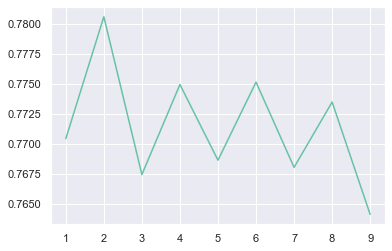

In [65]:
plt.plot(k_range,scores_list)

In [66]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_resampled,y_resampled)
y_pred_train_knn2 = knn.predict(X_resampled)
y_pred_test_knn2 = knn.predict(rescaledX_test)

In [67]:
print(classification_report(y_resampled,y_pred_train_knn2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15678
           1       1.00      0.99      1.00     15599

    accuracy                           1.00     31277
   macro avg       1.00      1.00      1.00     31277
weighted avg       1.00      1.00      1.00     31277



In [68]:
print(classification_report(y_test,y_pred_test_knn2))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84     11360
           1       0.54      0.75      0.63      3700

    accuracy                           0.78     15060
   macro avg       0.72      0.77      0.74     15060
weighted avg       0.82      0.78      0.79     15060



## SVM using SMOTEENN

In [69]:
from sklearn.svm import SVC
model = SVC(random_state=0,kernel='sigmoid').fit(X_resampled, y_resampled)
y_pred_train_re = model.predict(rescaledX_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_train_re))
print(y_pred_train_re)
print(model.intercept_)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     11360
           1       0.47      0.77      0.58      3700

    accuracy                           0.73     15060
   macro avg       0.69      0.74      0.69     15060
weighted avg       0.80      0.73      0.75     15060

[0 0 1 ... 1 0 1]
[-58.47396499]


## XGBoost

In [70]:
from xgboost import XGBClassifier

In [71]:
xgbc = XGBClassifier(n_jobs=-1, random_state=2,scale_pos_weight=3)

xgbc.fit(rescaledX,y_train)
y_pred_xgbc_test = xgbc.predict(rescaledX_test)
y_pred_xgbc_train = xgbc.predict(rescaledX)

In [72]:
print(classification_report(y_train,y_pred_xgbc_train))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     22654
           1       0.68      0.91      0.78      7508

    accuracy                           0.87     30162
   macro avg       0.82      0.88      0.84     30162
weighted avg       0.89      0.87      0.88     30162



In [73]:
print(classification_report(y_test,y_pred_xgbc_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88     11360
           1       0.62      0.83      0.71      3700

    accuracy                           0.83     15060
   macro avg       0.78      0.83      0.79     15060
weighted avg       0.86      0.83      0.84     15060



# HyperParameter tuning

In [74]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=xgbc, param_grid=dict(learning_rate=[0.01,0.1],max_depth=[3,7]),scoring="recall").fit(rescaledX,y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.01, 'max_depth': 3}
accuracy : 0.8859929155086135


# Final Model - XGBoost

In [75]:
xgbc = XGBClassifier(n_estimators=5000,n_jobs=-1, learning_rate= 0.01,max_depth= 3, random_state=2,scale_pos_weight=3)

xgbc.fit(rescaledX,y_train)
y_pred_xgbc_test = xgbc.predict(rescaledX_test)
y_pred_xgbc_train = xgbc.predict(rescaledX)

In [76]:
print(classification_report(y_train,y_pred_xgbc_train))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     22654
           1       0.63      0.88      0.73      7508

    accuracy                           0.84     30162
   macro avg       0.79      0.85      0.81     30162
weighted avg       0.87      0.84      0.85     30162



In [77]:
print(classification_report(y_test,y_pred_xgbc_test))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     11360
           1       0.61      0.86      0.71      3700

    accuracy                           0.83     15060
   macro avg       0.78      0.84      0.79     15060
weighted avg       0.86      0.83      0.84     15060



In [78]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgbc_test).ravel()
print([tp,fp])
print([fn,tn])

[3164, 2040]
[536, 9320]


Text(0, 0.5, 'Variable')

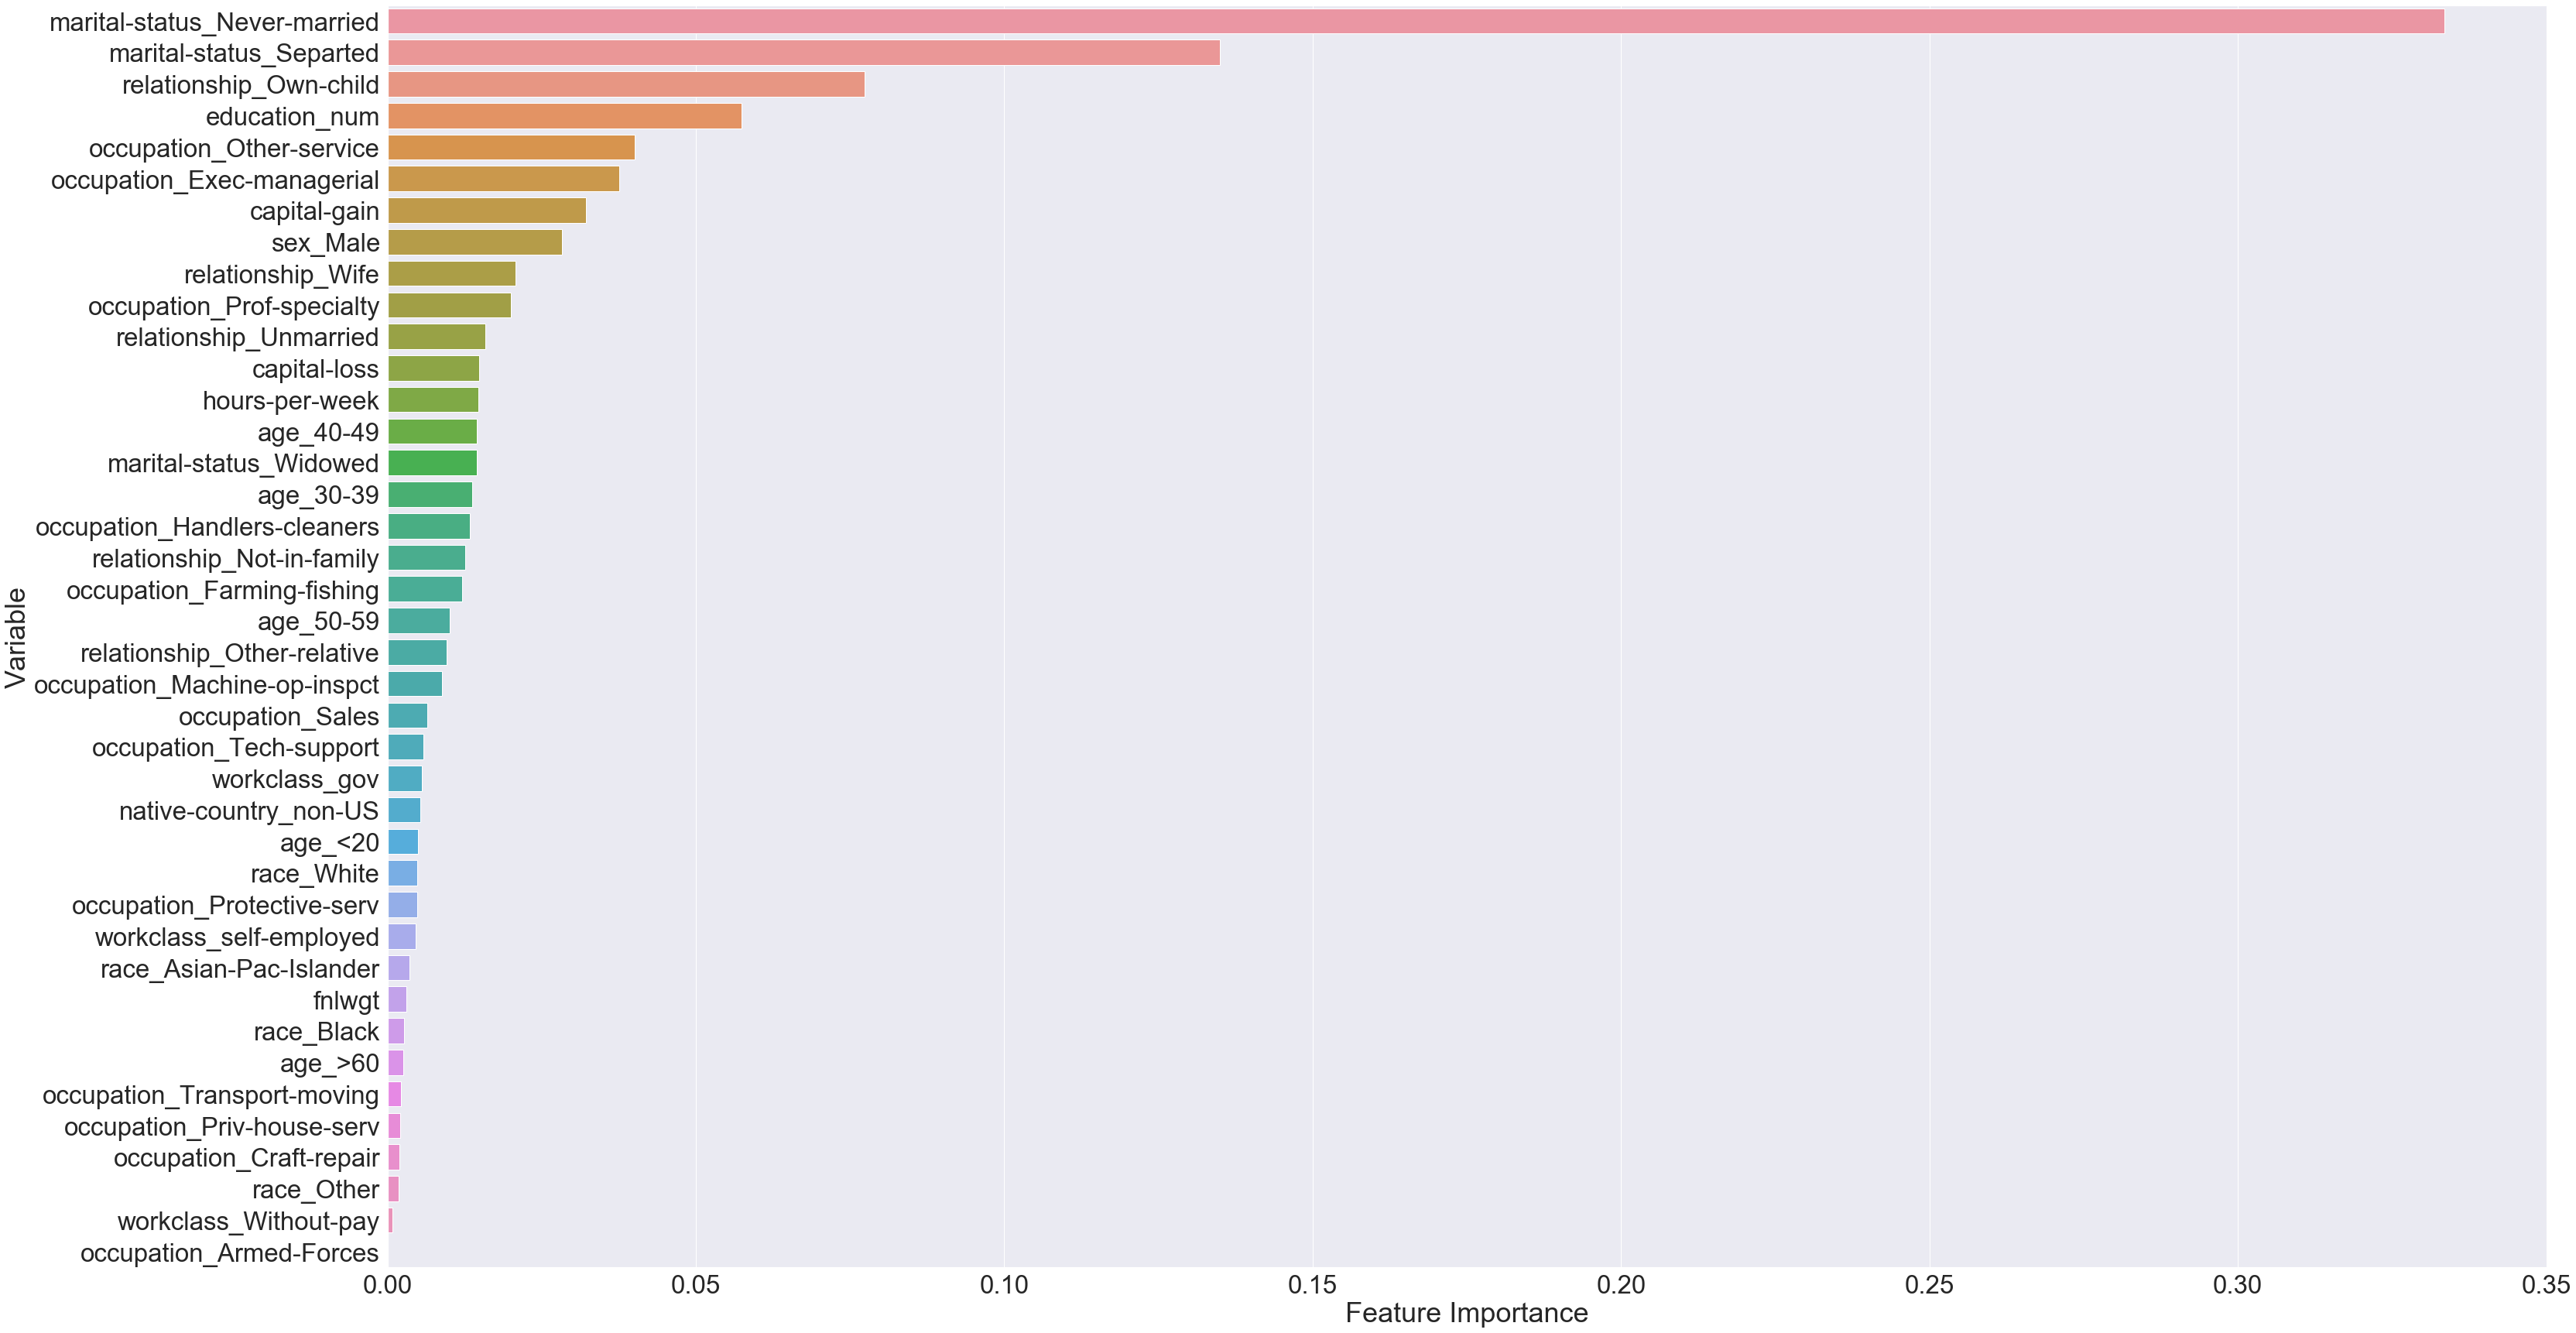

In [80]:
fig,ax= plt.subplots(figsize = (50,30)) 
importance =  pd.DataFrame({'Variable':X_train.columns,'Importance':xgbc.feature_importances_}).sort_values('Importance', ascending=False)
sns.set(style = "darkgrid", font_scale  =3, palette = "Set2", )
sns.barplot(x ="Importance", y = "Variable", data = importance)
plt.xlabel("Feature Importance")
plt.ylabel("Variable")